In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from nanodrt.drt_solver.drt import DRT
from nanodrt.fitting.optimizer import Optimizer
from nanodrt.drt_solver.measurements import ImpedanceMeasurement
from nanodrt.drt_solver.utils import (ZARC, 
                                 gamma_ZARC)
from nanodrt.plotting.plots import Plot

import jax.numpy as jnp 
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Upload the Data and create a Measurement Object 

#columns = ["f", "Z_re", "Z_im"]
df = pd.read_csv("data/single_ZARC.csv")

f = df["f"].values
tau = jnp.flip(jnp.logspace(-3, 3, 500))

Z_exact_re =  df["Z_re"].values # can we do all this inside the measurement?
Z_exact_im =  df["Z_im"].values

# Create our measurement object
measurement = ImpedanceMeasurement(Z_exact_re, Z_exact_im, f)

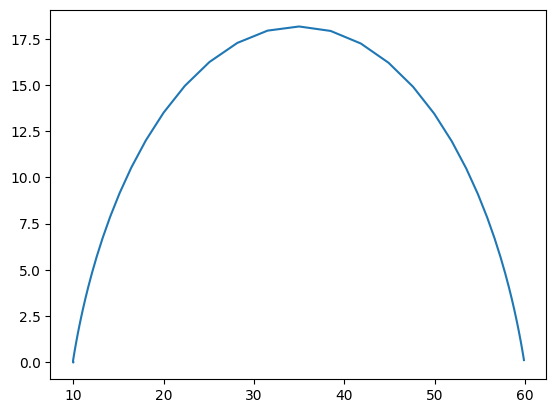

In [ ]:
plt.plot(Z_exact_re, -Z_exact_im)
plt.show()

In [7]:
f = jnp.logspace(-6, 6, 500)
R_inf = 50.0 
R_ct = 10.0 
tau_0 = 0.01
phi = 0.7

data = ZARC(f, R_inf, R_ct, tau_0, phi)
plt.plot(data.real, data.imag)

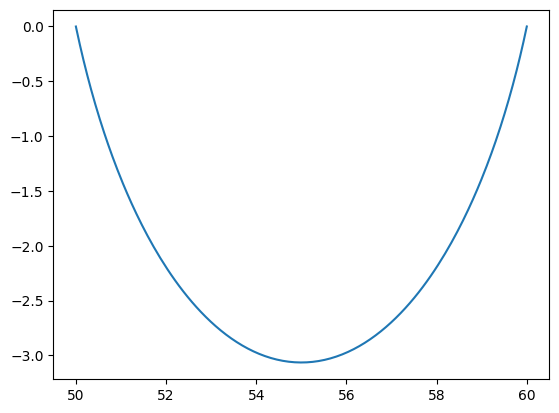

In [10]:
plt.plot(data.real, -data.imag)


In [12]:
df = pd.DataFrame({'f': f,
                   'Z_re': data.real,
                   "Z_im": data.imag})

In [13]:
df.to_csv("fake_data.csv")

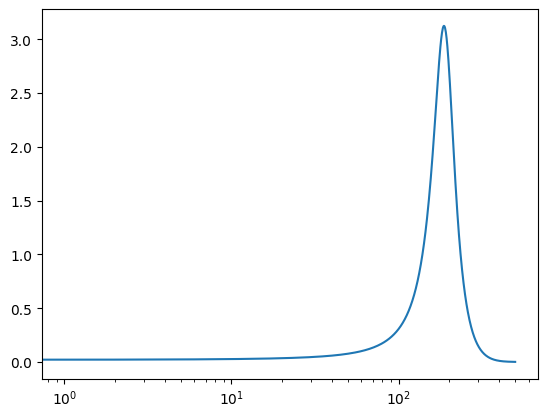

In [17]:
tau = jnp.logspace(-4, 4, 500)
gamma = gamma_ZARC(tau, R_ct, tau_0, phi)
plt.plot(gamma)
plt.xscale("log")